# Adult Classification Problem

In [55]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler 
from sklearn.preprocessing import RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.model_selection import GridSearchCV

## 1. Import Data

In [44]:
cols = ['age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status', 
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
        'hours-per-week', 'native-country', 'class']
features = ['age', 'workclass', 'fnlwgt','education', 'education-num', 'marital-status', 
        'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 
        'hours-per-week', 'native-country']
data = pd.read_csv('./ADULT/adult.data', header = None, names = cols)

In [26]:
data.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


## 2. Clean and Preprocess Data

In [45]:
# Types in each column
print(data.dtypes)

# Drop any nulls, shown as question marks
for i in range(len(data)):
    for col in cols:
        if data[col][i] == ' ?':
            data.drop(i, inplace = True)
            break

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object


In [46]:
data.shape

(30162, 15)

In [47]:
# Preprocess last column
def transform_income(income):
    if income == ' <=50K':
        return 0
    else:
        return 1

In [48]:
data['class'] = data['class'].apply(transform_income)

In [49]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [50]:
X = data[features]
y = data['class']

In [51]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [57]:
features

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country']

In [60]:
X = pd.get_dummies(X, columns=['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race',
 'sex','native-country'])

In [64]:
# Types in each column
print(X.dtypes)
print(y.dtypes)

age                                int64
fnlwgt                             int64
education-num                      int64
capital-gain                       int64
capital-loss                       int64
                                   ...  
native-country_ Thailand           uint8
native-country_ Trinadad&Tobago    uint8
native-country_ United-States      uint8
native-country_ Vietnam            uint8
native-country_ Yugoslavia         uint8
Length: 104, dtype: object
int64


## Algorithm 1: Logistic Regression

In [79]:
def draw_heatmap(training_accuracy, C_list, label):
    # training_accuracy: A NumPy array with the shape (len(C_list))
    # C_list: List of C(s).
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(training_accuracy, annot=True, fmt='.3f', 
                     xticklabels=[], yticklabels=C_list)
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$C$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.title(label + 'accuracy w.r.t $C$')
    plt.show()

In [84]:
def log_reg():
    # Logistic Regression binary classification
    C_list = [1e-8, 1e-7, 1e-6, 1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
    parameters = {'C': C_list}
    classifier = LogisticRegression(n_jobs = -1, max_iter = 1000)
    clf = GridSearchCV(classifier, parameters, return_train_score = True, n_jobs = -1)
    clf.fit(X_train, y_train)
    
    #Extract training and validation accuracies and plot as heat maps to visualize best C parameter
    train_acc = clf.cv_results_['mean_train_score'].reshape(-1, 1)
    draw_heatmap(train_acc, C_list, 'Training ')
    
    val_acc = clf.cv_results_['mean_test_score'].reshape(-1, 1)
    draw_heatmap(val_acc, C_list, 'Validation ')
    
    # Use best parameters to define best model and fit to all training data
    best_model = LogisticRegression(C=clf.best_params_['C'])
    best_model.fit(X_train, y_train)
    
    # Find test accuracy and generalization error
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]
            
    test_acc = best_model.score(X_test, y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

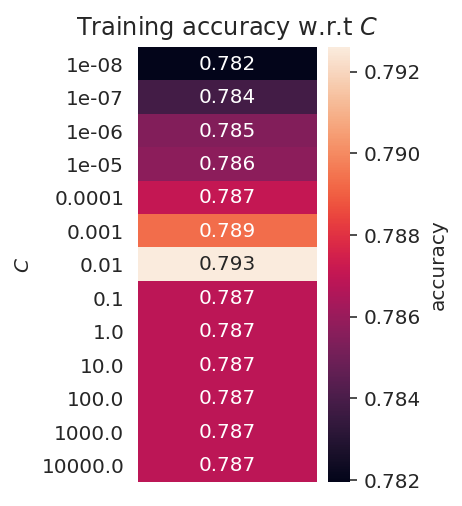

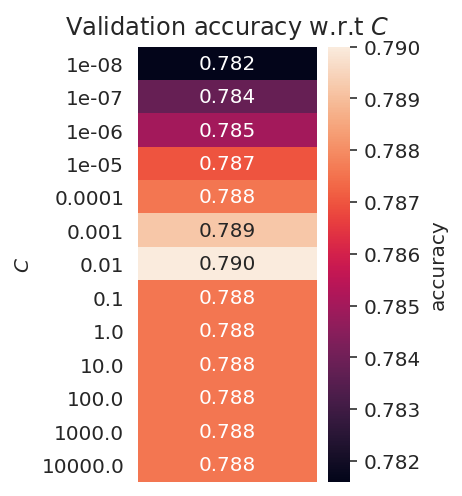

Test accuracy:  0.7932596772911533
Best Train accuracy:  [0.7926]
Best C Parameter:  0.01


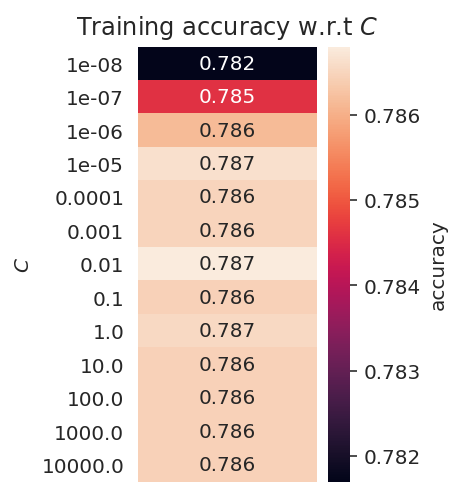

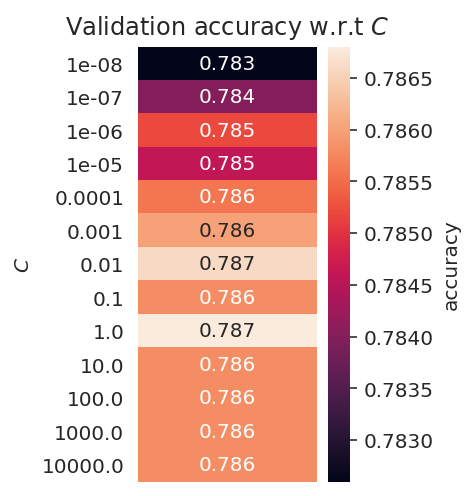

Test accuracy:  0.7900802797869804
Best Train accuracy:  [0.78655]
Best C Parameter:  1.0


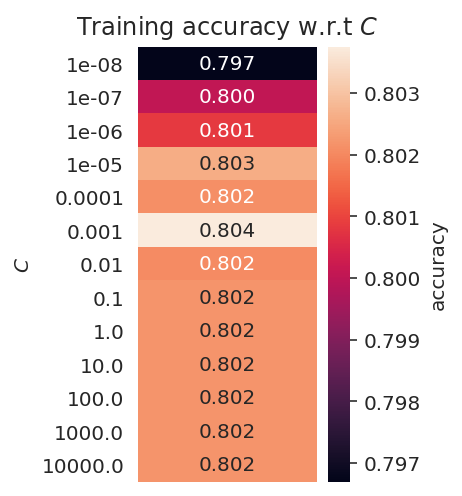

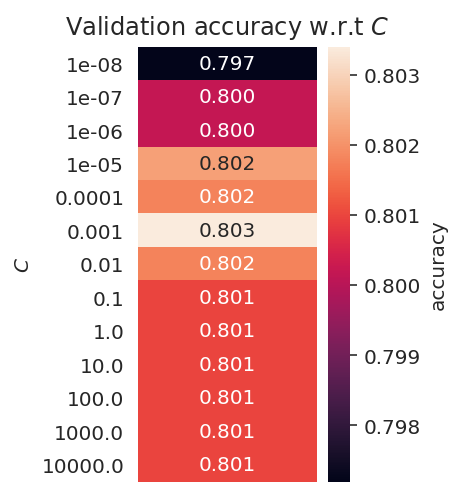

Test accuracy:  0.7888085207853112
Best Train accuracy:  [0.80375]
Best C Parameter:  0.001


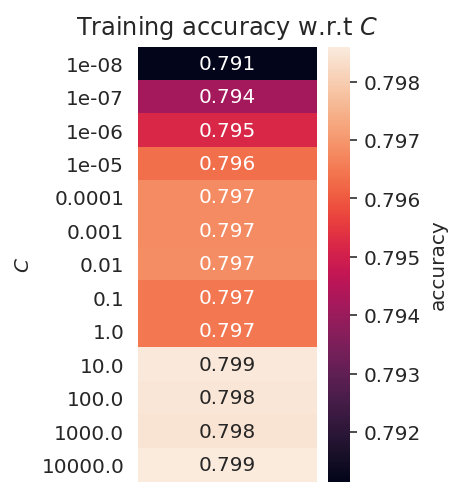

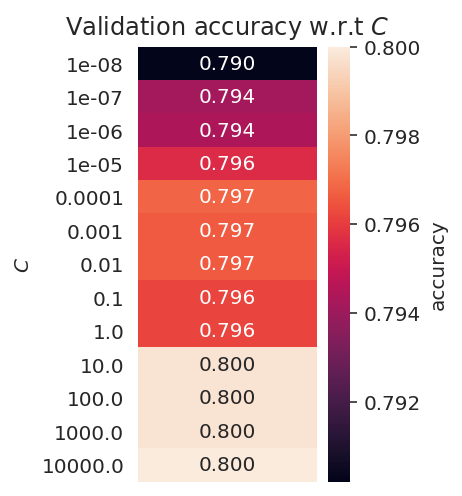

Test accuracy:  0.7901597647245847
Best Train accuracy:  [0.7986]
Best C Parameter:  10000.0


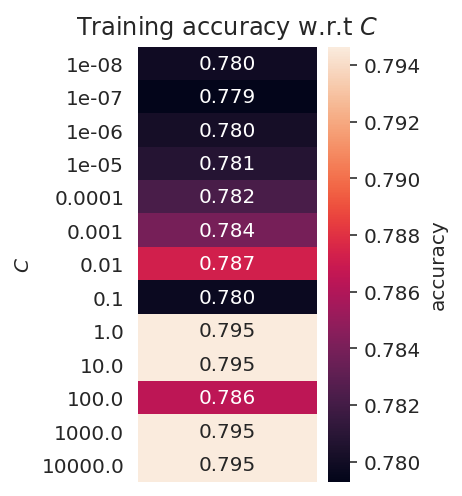

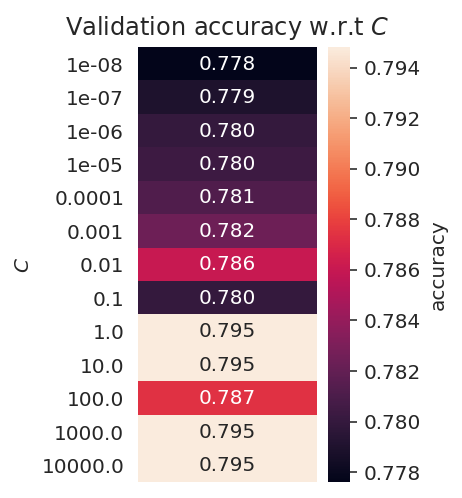

/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test accuracy:  0.8148398378507273
Best Train accuracy:  [0.7946]
Best C Parameter:  1.0


In [87]:
for trial in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 5000)
    test_acc, best_train_acc, best_C = log_reg()
    print('Test accuracy: ', test_acc)
    print('Best Train accuracy: ', best_train_acc)
    print('Best C Parameter: ', best_C)

In [88]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 5000, shuffle = True, random_state = 42)
#test_acc, best_train_acc, best_C = log_reg()

In [86]:
test_acc

0.7878547015340593